<a href="https://colab.research.google.com/github/aarifmahdi/AI_labs2025/blob/main/dataPreProcessing_titanicDataset_lab01Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Step 0: Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

Load dataset:

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AI_Labs2025/D2_titanic_modified.csv')
df.head()

,gender,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Step 1: Identify Target

The target variable = "alive" (binary: 0 = no, 1 = yes).

Step 2: Drop features with too many missing values

deck column usually has a lot of NaNs → drop it:

In [ ]:
df = df.drop(columns=["deck"])

Step 3: Handle Missing Age

Options: mean, median, grouped mean by gender, etc.
Let’s use median age (robust against outliers):

In [ ]:
df["age"] = df["age"].fillna(df["age"].median())

Step 4: Handle Missing Embark Town

Best → drop rows with missing values:

In [ ]:
df.dropna(subset=["embark_town"])

,gender,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,female,28.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


Step 5: Binary Encoding

Convert categorical yes/no features (sex, adult_male, alive, alone):

In [ ]:
binary_cols = ["gender", "adult_male", "alive", "alone"]
for col in binary_cols:
  df[col] = df[col].map({"male":1, "female":0, "yes":1, "no":0, True:1, False:0})

Step 6: Drop Duplicates / Redundant Features

embarked and embark_town → keep one (embark_town).

who vs adult_male → drop adult_male.

In [ ]:
df = df.drop(columns=["embarked"])

Step 7: One-Hot Encoding

For who and embark_town:

In [ ]:
df = pd.get_dummies(df, columns=["who", "embark_town"], drop_first=True)

Step 8: Age Binning

Before normalization, make bins:

In [ ]:
bins = [-1, 1, 12, 19, 40, 60, 120]
labels = ["infant", "child", "teenager", "young", "middle_aged", "old"]
df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels)

Step 9: Normalization / Standardization

Standardize numerical columns:

In [ ]:
scaler = StandardScaler()
num_cols = ["age", "fare"]
df[num_cols] = scaler.fit_transform(df[num_cols])

Step 10: Visualization (simple)

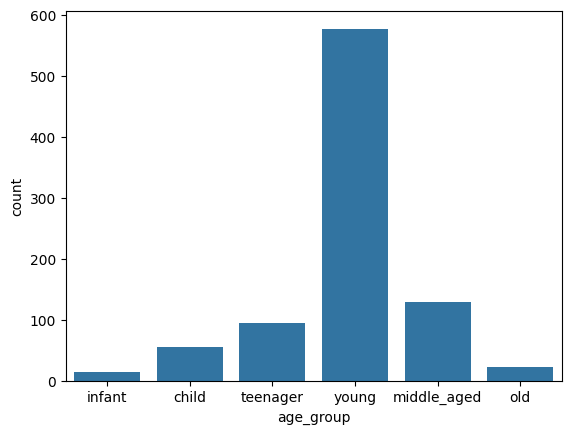

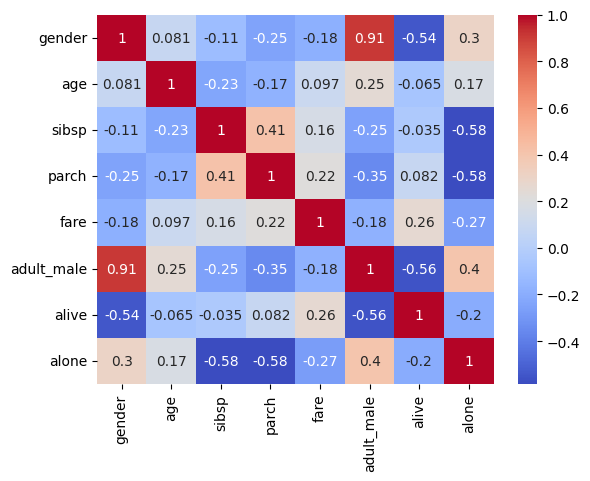

In [ ]:
sns.countplot(x="age_group", data=df)
plt.show()

print()

sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.show()

Save output permanently

Cleaned dataset

In [ ]:
df.to_csv('/content/drive/MyDrive/AI_Labs2025/titanic_cleaned.csv', index=False)